<a href="https://colab.research.google.com/github/ValdazoAmerico/binary-text-classification/blob/main/binary_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install umap-learn

     |████████████████████████████████| 80 kB 2.8 MB/s 
     |████████████████████████████████| 1.1 MB 12.1 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76564 sha256=14debd4d04924eef398d3031c6c565325c4f26fb4cea97932ac68b9fc99bf26b
  Stored in directory: /root/.cache/pip/wheels/01/e7/bb/347dc0e510803d7116a13d592b10cc68262da56a8eec4dd72f
  Created wheel for pynndescent: filename=pynndescent-0.5.5-py3-none-any.whl size=52603 sha256=9818b638582322e6f1f05f935e23ba3a8977fd562f9cf8dbd3a036fa78cc22cc
  Stored in directory: /root/.cache/pip/wheels/af/e9/33/04db1436df0757c42fda8ea6796d7a8586e23c85fac355f476
Successfully built umap-learn pynndescent


In [ ]:
pip install tensorflow_text

     |████████████████████████████████| 4.4 MB 5.2 MB/s 


In [ ]:
#Modelo de prediccion de fraude 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import sklearn 

In [ ]:
data = pd.read_csv('/content/Fraude.csv', index_col= "incidente_id")
data = pd.DataFrame(data)
data = data[data['Minutos con segundos'].notnull()]
len(data)
data["Fraude"].value_counts()
data  = data.drop(["cuit", "att_category"], axis=1)


In [ ]:
data2 = pd.read_csv('/content/Normal.csv', index_col="incidente_id")
data2 = pd.DataFrame(data2)
data2 = data2[data2['Minutos con segundos'].notnull()]
len(data2)
data2["Fraude"].value_counts()
data2  = data2.drop(["cuit", "att_category"], axis=1)
data2.columns

Index(['Minutos con segundos', 'diagnostico', 'destino_final', 'epicrisis',
       'complain_text', 'Posee Prescription', 'Posee medical order', 'Fraude'],
      dtype='object')

In [ ]:
fraude = data[data['Fraude'] == "FRAUDE"]
normal = data2[data2["Fraude"] == "NORMAL"]
df = pd.concat([fraude,normal])
#df.head()
#df.describe()
#df.value_counts("Fraude")
#print(df.describe().T)
#print(len(df.index))
#print(len(df))
#df.columns
#df[df["Fraude"] == "FRAUDE"]["diagnostico"].value_counts()
df = pd.get_dummies(df, columns = ["destino_final"])
df["Posee medical order"] = df["Posee medical order"].replace("NO POSEE",0)
df["Posee medical order"] = df["Posee medical order"].replace("POSEE",1)
df["Posee medical order"] = df["Posee medical order"].replace("POSEE ORDER",1)
df["Posee Prescription"] = df["Posee Prescription"].replace("NO POSEE",0)
df["Posee Prescription"] = df["Posee Prescription"].replace("POSEE PRESCRIPTION",1)
df["Fraude"] = df["Fraude"].replace("FRAUDE",1)
df["Fraude"] = df["Fraude"].replace("NORMAL",0)


In [ ]:
df['Fraude'].value_counts()

1    29999
0    28340
Name: Fraude, dtype: int64

In [ ]:
df['Posee medical order'].value_counts()

0    57965
1      374
Name: Posee medical order, dtype: int64

In [ ]:
df = df.sample(frac=1)

In [ ]:
df['epicrisis'] = df['epicrisis'].fillna('')

In [ ]:
df['len_epicrisis'] = df['epicrisis'].apply(lambda x: len(x.split()))

In [ ]:
df.sort_values(by=['len_epicrisis'],ascending=False)

,Minutos con segundos,diagnostico,epicrisis,complain_text,Posee Prescription,Posee medical order,Fraude,destino_final_En domicilio con instrucciones,destino_final_En domicilio con monitoreo,destino_final_Evaluación en amarillo,destino_final_Evaluación en rojo,destino_final_Evaluación en verde VMD,destino_final_Indico concurrir a guardia externa,destino_final_Indico seguimiento por consultorio externo,destino_final_Traslado protocolo pandemia,len_epicrisis
incidente_id,,,,,,,,,,,,,,,,
2020-09-29_20-49-59-579652,10.766667,INESP Sospecha COVID19,Antecedentes: queratocono con transplante de c...,Todavía estoy esperando ser atendida,0,0,0,0,1,0,0,0,0,0,0,384
2020-10-23_07-44-45-980474,13.150000,INESP Sospecha COVID19,Antecedentes: niega\nPaciente se comunica por ...,Al momento no me llamo nadie.,0,0,0,0,1,0,0,0,0,0,0,353
2020-10-20_14-49-314740,11.583333,INESP Sospecha COVID19,Antecedentes: celiaquia\nCuadro de 3 días de t...,A qué hora es la consulta,0,0,0,0,1,0,0,0,0,0,0,350
2020-12-05_14-36-51-164696,6.500000,INESP Sospecha COVID19,Antecedentes: niega\nCuadro de 4 dias de conge...,Estoy esperando hace mucho tiempo por un médico,0,0,0,0,1,0,0,0,0,0,0,349
2020-10-05_14-41-58-419385,11.666667,INESP Sospecha COVID19,Antecedentes: asma\nCuadro de 3 días de dorsal...,En mensaje que me llega es que hay una débil c...,0,0,0,0,1,0,0,0,0,0,0,347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-08_13-14-31-974974,1.333333,OTRO Eval Examen médico parcial Pre-op. (335),,NaN,0,0,1,1,0,0,0,0,0,0,0,0
2021-01-03_17-47-00-846446,0.733333,RESP Infección respiratoria aguda del tracto...,,NaN,0,0,1,1,0,0,0,0,0,0,0,0
2020-09-10_10-47-40-284903,1.883333,INESP Alta COVID19,,NaN,0,0,1,0,0,0,0,0,0,1,0,0


In [ ]:
df.len_epicrisis.value_counts()

0      43451
19       521
20       520
21       473
18       473
       ...  
138        1
118        1
342        1
131        1
127        1
Name: len_epicrisis, Length: 142, dtype: int64

In [ ]:
#from imblearn.over_sampling import RandomOverSampler   ·Esto sirve para aumentar la data cuando uno esta desbalancedado
#from imblearn.under_sampling import RandomUnderSampler   #Esto sirve para disminuir la data cuando uno esta desbalancedado
#rus = RandomUnderSampler()
#rus.fit_resample(data2[["incidente_id"]], data2["Fraude"])

In [ ]:
import tensorflow as tf
import tensorflow_text
import tensorflow_hub as hub

In [ ]:
# The 16-language multilingual module is the default but feel free
# to pick others from the list and compare the results.
module_url = 'https://tfhub.dev/google/universal-sentence-encoder-multilingual/3' #@param ['https://tfhub.dev/google/universal-sentence-encoder-multilingual/3', 'https://tfhub.dev/google/universal-sentence-encoder-multilingual-large/3']

model = hub.load(module_url)

def embed_text(input):
  return model(input)

In [ ]:
from tqdm import tqdm

In [ ]:
list_complain = df['diagnostico'].tolist()

In [ ]:
len(list_complain)

58339

In [ ]:
lista = []
for x in tqdm(list_complain):
  emb = embed_text (x)[0].numpy()
  lista.append (emb)

100%|██████████| 58339/58339 [12:42<00:00, 76.55it/s]


In [ ]:
import umap
reducer = umap.UMAP()

In [ ]:
embedding = umap.UMAP(n_components=4).fit_transform(lista)

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


In [ ]:
df = df.drop(['diagnostico'], axis=1)

In [ ]:
df = df.drop(['epicrisis'], axis=1)

In [ ]:
df = df.drop(['complain_text'], axis=1)

In [ ]:
embedding = embedding.tolist()

In [ ]:
columna1 = []
for e in embedding:
  columna1.append(e[0])

In [ ]:
columna2 = []
for e in embedding:
  columna2.append(e[1])

In [ ]:
columna3 = []
for e in embedding:
  columna3.append(e[2])

In [ ]:
columna4 = []
for e in embedding:
  columna4.append(e[3])

In [ ]:
df['columna1'] = columna1 

In [ ]:
df['columna2'] = columna2

In [ ]:
df['columna3'] = columna3

In [ ]:
df['columna4'] = columna4

In [ ]:
df.to_csv('df_clasificador_large_embeddings.csv')

In [ ]:
df.head()

,Minutos con segundos,Posee Prescription,Posee medical order,Fraude,destino_final_En domicilio con instrucciones,destino_final_En domicilio con monitoreo,destino_final_Evaluación en amarillo,destino_final_Evaluación en rojo,destino_final_Evaluación en verde VMD,destino_final_Indico concurrir a guardia externa,destino_final_Indico seguimiento por consultorio externo,destino_final_Traslado protocolo pandemia,len_epicrisis,columna1,columna2,columna3,columna4
incidente_id,,,,,,,,,,,,,,,,,
2020-09-05_18-53-20-494951,1.416667,0,0,1,1,0,0,0,0,0,0,0,0,-7.050799,2.808278,1.585025,-1.167118
2020-09-10_04-33-167640,0.783333,0,0,1,1,0,0,0,0,0,0,0,0,3.515587,-0.399531,13.370889,6.015686
2020-09-02_14-24-00-168073,7.850000,0,0,0,1,0,0,0,0,0,0,0,0,-0.217099,9.605306,15.908562,2.043566
2021-02-10_17-55-39-201321,1.716667,0,0,1,1,0,0,0,0,0,0,0,0,-0.185462,9.661146,16.071068,0.987371
2021-01-08_18-41-07-825078,1.433333,0,0,1,1,0,0,0,0,0,0,0,0,-0.811134,6.447551,0.555244,0.964808


In [ ]:
df = df.drop(['diagnostico_embeddings'], axis=1)

In [ ]:
input = df.drop(['Fraude'],axis=1).values

In [ ]:
#Traigo skelearn para armar los cortes en la data
from sklearn.model_selection import train_test_split 

#Se configuran las 2 variables train y test.
train, test= train_test_split(df, test_size = 0.33, random_state = 42)


In [ ]:
#Separamos los datasets para train y tst 
train_x, train_y = train.drop("Fraude",axis = 1), train["Fraude"]
test_x, test_y = test.drop("Fraude", axis = 1 ), test["Fraude"]

In [ ]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

# SVC

In [ ]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression


text_clf = SVC()
text_clf.fit(train_x, train_y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
input[0]

array([ 1.41666667,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -7.05079937,  2.80827808,  1.58502519,
       -1.16711831])

In [ ]:
text_clf.predict([[ 0.9       ,  0.        ,  0.        ,  1.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        , -8.17980194,  2.30580664,  2.1807344 ,
       22.77007103]])

array([1])

In [ ]:
labels = text_clf.predict(test_x)

In [ ]:
target_names = [0,1]

Text(91.68, 0.5, 'predicted label')

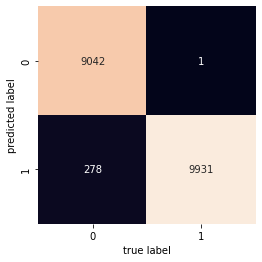

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(test_y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names,yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
def predict_category(s, target_names=target_names, model=text_clf):
  pred = model.predict([s])
  return  target_names[pred[0]]

In [ ]:
array = []
for t in input:
  array.append(predict_category(t))

In [ ]:
df['pred'] = array

In [ ]:
from sklearn.metrics import classification_report
y_true = df['Fraude']
y_pred = df['pred']
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     28340
           1       0.97      1.00      0.99     29999

    accuracy                           0.99     58339
   macro avg       0.99      0.98      0.99     58339
weighted avg       0.99      0.99      0.99     58339



# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
text_lgc = LogisticRegression()
text_lgc.fit(train_x, train_y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
test_x[0]

array([4.11666667, 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [ ]:
text_lgc.predict([[ 4.51666667,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
        0.        , 10.        ]])

array([0])

In [ ]:
labels = text_lgc.predict(test_x)

In [ ]:
target_names = [0,1]

Text(91.68, 0.5, 'predicted label')

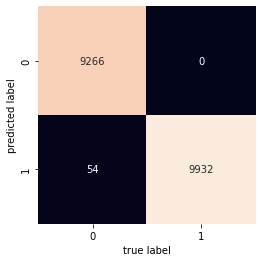

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(test_y, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, xticklabels=target_names,yticklabels=target_names)

plt.xlabel('true label')
plt.ylabel('predicted label')

In [ ]:
def predict_category(s, target_names=target_names, model=text_lgc):
  pred = model.predict([s])
  return  target_names[pred[0]]

In [ ]:
array = []
for t in input:
  array.append(predict_category(t))

In [ ]:
df['pred'] = array

In [ ]:
from sklearn.metrics import classification_report
y_true = df['Fraude']
y_pred = df['pred']
print(classification_report(y_true,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     28340
           1       0.99      1.00      1.00     29999

    accuracy                           1.00     58339
   macro avg       1.00      1.00      1.00     58339
weighted avg       1.00      1.00      1.00     58339

